##Connecting to GDrive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/tubes/ML_CLS

Mounted at /gdrive
/gdrive/My Drive/tubes/ML_CLS


Dataset dapat diunduh pada link berikut : [WINE FOR CLUSTERING](https://www.kaggle.com/harrywang/wine-dataset-for-clustering/)

##Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#PREPROCESSING

##Load Dataframe

In [3]:
df = pd.read_csv('wine-clustering.csv')

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [ ]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

##*'Float'ing* Everything

In [7]:
df.astype('float64')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##Fungsi Normalisasi

In [8]:
def normal(x):
  return (x-x.min()) / (x.max()-x.min())

##Menormalisasi Data

In [9]:
col = list(df.columns)
for i in range(len(col)):
  df[[col[i]]] = df[[col[i]]].apply(normal)

In [10]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


##VISUALISASI DATA

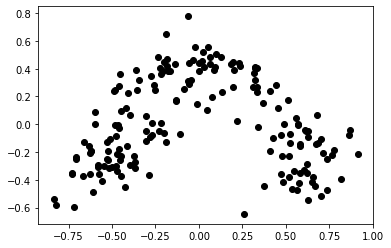

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
plt.scatter(pca_2d[:,0],pca_2d[:,1],c='black')
plt.show()

#FUNGSI CLUSTERISASI

##PILIH INDEX CENTROID

In [12]:
def centroidindexpick(k,dfnya):
  return np.random.choice(len(dfnya['Ash']),k, replace=False)

##AMBIL DATA CENTROID

In [13]:
def centroidpick(key,dfq):
  k = centroidindexpick(key,dfq)
  centroid = []
  for i in k:
    centroid.append([i,list(dfq.iloc[i])])
  return centroid


##MENENTUKAN JARAK

In [14]:
def euclidean(kiri,kanan):
  sum = 0
  for i in range(len(kiri)):
    sum = sum + (kiri[i]-kanan[i])**2
  return np.sqrt(sum)

In [15]:
def jarak(dfww, centroid):
  pilihcluster = []
  for i in range(len(centroid)):
    temp =[]
    for j in range(len(list(dfww['Ash']))):
      p1 = centroid[i][1]
      p2 = list(dfww.iloc[j])
      temp.append([str(i),euclidean(p1,p2)])
    pilihcluster.append(temp)
  return pilihcluster


##MEMILIH CLUSTER

In [16]:
def pilihcluster(jarak):
  clusternya=[]
  elbow = []

  for i in range(len(jarak[0])):
    pilihjarak = []
    pilihclusterjarak = []
    for j in range(len(jarak)):
      pilihclusterjarak.append(jarak[j][i])
      #print(pilihclusterjarak)
      pilihjarak.append(jarak[j][i][1])
    a = min(pilihjarak)
    #print(a)
    for k in range(len(pilihclusterjarak)):
      if a in pilihclusterjarak[k]:
        clusternya.append(int(pilihclusterjarak[k][0]))
        elbow.append(pilihclusterjarak[k][1]**2)
        #print(clusternya)
        break
    elbownya = sum(elbow)
  return clusternya,elbownya


##FUNGSI ITERASI CLUSTERING

In [17]:
def clusterit(dfg,k,centroid):
  clust = jarak(dfg,centroid)
  cluster,elbow = pilihcluster(clust)
  dfgx = dfg
  dfgx.insert(13,'cluster',cluster)
  df3 = dfgx.groupby('cluster').mean()
  df3.reset_index
  #display(df3)
  barucentroid = []
  for i in range(k):
    barucentroid.append([i,list(df3.iloc[i])])
    #display(barucentroid)
   # print(barucentroid)
  return barucentroid

##FUNGSI CLUSTERING K OPTIMUM

In [18]:
def clusterfix(df2,k,centroid):
  clust = jarak(df2,centroid)
  cluster,elbow = pilihcluster(clust)
  df21 = df2
  df21.insert(13,'cluster',cluster)
  df3 = df21.groupby('cluster').mean()
  df3.reset_index
  #display(df3)
  barucentroid = []
  for i in range(k):
    barucentroid.append([i,list(df3.iloc[i])])
  return df2, barucentroid,elbow

#CLUSTERISASI

#####JIKA TERJADI ERROR SAAT RUNNING

In [ ]:
df = df.drop('cluster',axis=1)

In [ ]:
df = pd.read_csv('wine-clustering.csv')
df.astype('float64')
def normal(x):
  return (x-x.min()) / (x.max()-x.min())
col = list(df.columns)
for i in range(len(col)):
  df[[col[i]]] = df[[col[i]]].apply(normal)

##Memilih K yang paling optimal



Jumlah iterasi K = 10


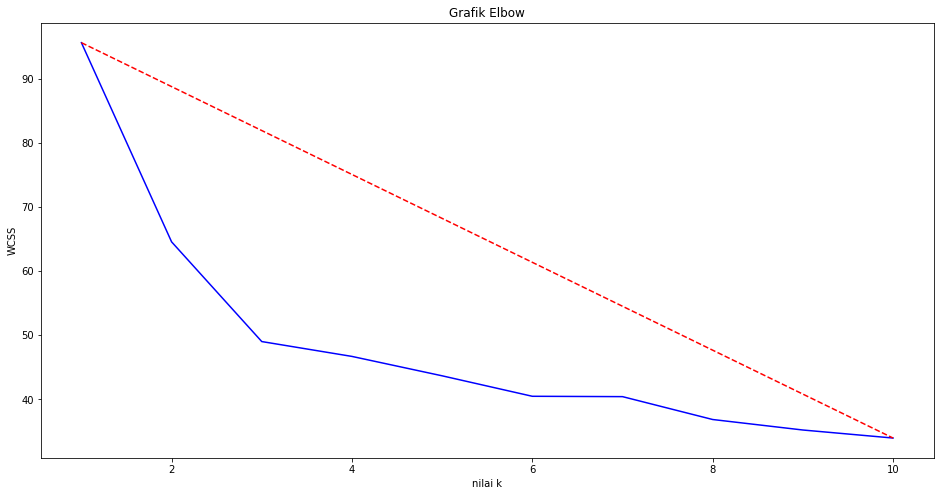

In [25]:
a  = int(input('Jumlah iterasi K = ')) +1
elbowgraph =[]
for i in range(1,a):
  #print(i)
  centx = centroidpick(i,df)
  newcent = clusterit(df,i,centx)
  while (centx != newcent):
    centx = newcent
    df = df.drop('cluster',axis=1)
    newcent = clusterit(df,i,centx)
  df = df.drop('cluster',axis=1)
  dfnew,fixcent,elbow = clusterfix(df,i,centx)
  elbowgraph.append(elbow)
  df = df.drop('cluster',axis=1)

fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Grafik Elbow')
graphX = np.arange(1,a)
ax.plot(graphX,elbowgraph,color='b',label = 'nilai WCSS')
b = [elbowgraph[0],elbowgraph[a-2]]
c = [1,a-1]
ax.plot(c,b, color='red', ls='dashed')
ax.set_xlabel('nilai k')
ax.set_ylabel('WCSS')
plt.show()


##CLUSTERING DENGAN K = 3

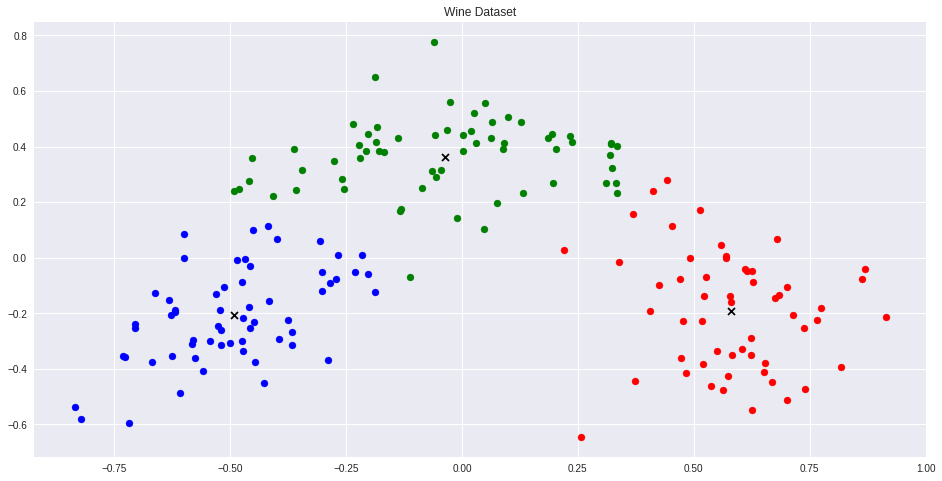

In [32]:
import seaborn as sns
k= 3
centx = centroidpick(k,df)
newcent = clusterit(df,k,centx)
while (centx != newcent):
  centx = newcent
  df = df.drop('cluster',axis=1)
  newcent = clusterit(df,k,centx)
df = df.drop('cluster',axis=1)
dfnew,fixcent,elbow = clusterfix(df,k,centx)
df = df.drop('cluster',axis=1)

#  PLOTTING

pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
clusterx  =list(dfnew['cluster'])
aa,ab,ba,bb,ca,cb =[],[],[],[],[],[]
for i in range (len(pca_2d[:,0])):
  if clusterx[i] == 0:
    aa.append(pca_2d[i,0])
    ab.append(pca_2d[i,1])
  elif clusterx[i] == 1:
    ba.append(pca_2d[i,0])
    bb.append(pca_2d[i,1])
  elif clusterx[i] == 2:
    ca.append(pca_2d[i,0])
    cb.append(pca_2d[i,1]) 


d = {0: fixcent[0][1], 1: fixcent[1][1], 2:fixcent[2][1]}
centnyaa = pd.DataFrame(d)
centnyaa = centnyaa.T

pca2 = PCA(n_components=2).fit(centnyaa)
pcacent = pca.transform(centnyaa)
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Wine Dataset')
plt.style.use('seaborn')
ax.scatter(aa,ab,c='green')
ax.scatter(ba,bb,c='blue')
ax.scatter(ca,cb,c='red')
ax.scatter(pcacent[:,0],pcacent[:,1], marker='x',color ='black')
plt.show()


##Jumlah Klaster

In [43]:
dfnew['cluster'].value_counts()

0    63
1    60
2    55
Name: cluster, dtype: int64